# **Data Science - Proyecto Final**

**Ingeniero de los Reyes Vidal, Luis A.**

# **Contexto comercial e introduccion**

Este proyecto tiene como finalidad analizar una base de datos de ventas de autos para determinar decisiones comerciales estratégicas, mejorar la eficiencia operativa y obtener la mejor experiencia en los clientes. Esto es fundamental para obtener los mejores resultados en terminos de costo de oportunidad en el sector automotriz.

El análisis de las ventas de autos proporciona información sobre los modelos y marcas más populares. Esto ayuda a los concesionarios y fabricantes a gestionar de manera más eficiente sus inventarios, enfocándose en los vehículos que tienen una mayor demanda. Al analizar la experiencia del cliente durante el proceso de compra proporciona información sobre qué aspectos impactan positiva o negativamente en la satisfacción del cliente. Esto permite implementar mejoras específicas para maximizar dicha satisfacción.

Estos aspectos principales permiter incrementar al maximo la experiencia obtenida por el cliente luego de su paso por los concesionarios. Si estos aspectos estan en armonia y son eficientes, se lograria una muy alta productividad como resultados en lo que refiere a lo comercial. Ya que lo unico que cuenta al final del proceso es que se lleva el cliente y si este volveria elegir la misma.

*Habilitar acceso*

In [1]:
from google.colab import drive
drive .mount('/content/dive')
from google.colab import files

Mounted at /content/dive


*Librerias a utilizar*

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import scipy.stats as ss
import warnings
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as ss
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

*Archivo con el que se va trabajar*

In [3]:
df_baseVentas = pd.read_excel('/content/dive/MyDrive/PRE-ENTREGAS_de los Reyes Vidal, Luis A./BASE DE DATOS AUTOMOTRIZ.xlsx')

In [4]:
df_baseVentas.head()

,ID Venta,Concesionario,Contacto inicial con el cliente,ID Cliente,Tipo de venta,Nombre del vendedor,Marca de la unidad,Tipo de unidad,Modelo de unidad,Color,Gama,Patente,Compra accesorios,Entrega de usados,Experiencia del cliente,Tiempo de entrega en dias
0,V0001,Concesionario 2,Presencial,AA00,Mayorista,Diego,Marca 2,0 Km,Modelo 3,Rojo,Alta,13ME,No,No,Muy buena,1
1,G0002,Concesionario 3,Digital,AA01,Particular,María,Marca 3,Usado,Modelo 3,Rojo,Baja,38BD,No,No,Mala,4
2,Z0003,Concesionario 1,Digital,AA02,Particular,Laura,Marca 1,Usado,Modelo 3,Amarillo,Baja,34KW,Si,Si,Mala,6
3,V0004,Concesionario 3,Presencial,AA03,Particular,Luis,Marca 1,Usado,Modelo 3,Azul,Media,16CR,Si,Si,Mala,4
4,V0005,Concesionario 1,Digital,AA04,Mayorista,Laura,Marca 1,0 Km,Modelo 1,Amarillo,Alta,84UI,No,No,Buena,2


**Hipotesis nula o alternativa**

*Hipótesis nula (H0)*:
No hay diferencia en la probabilidad de que un nuevo cliente tenga una buena experiencia en el mercado automotriz.

*Hipótesis alternativa (H1)*:
Existe una diferencia en la probabilidad de que un nuevo cliente tenga una buena experiencia en el mercado automotriz.

La hipótesis nula sugiere que el modelo de predicción no tiene un impacto significativo en la capacidad de predecir si un nuevo cliente tendrá una buena experiencia en el mercado automotriz. Mientras que la hipótesis alternativa sugiere lo contrario: que el modelo de predicción tiene un impacto significativo en la capacidad de predecir la experiencia de los nuevos clientes.

# **Analisis exploratorio de los datos**

In [5]:
# Pestaña de Ventas
df_baseVentas.info()

# Número de filas y columnas
num_filas_ventas, num_columnas_ventas = df_baseVentas.shape
print(f'La pestaña de Ventas tiene {num_filas_ventas} filas y {num_columnas_ventas} columnas.')

# Tipos de datos de cada columna
tipos_datos_ventas = df_baseVentas.dtypes
print('\nTipos de datos por columna:')
print(tipos_datos_ventas)

# Estadísticas descriptivas
descripcion_ventas = df_baseVentas.describe(include='all')
print('\nEstadísticas Descriptivas:')
display(HTML(descripcion_ventas.to_html()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ID Venta                         2000 non-null   object
 1   Concesionario                    2000 non-null   object
 2   Contacto inicial con el cliente  2000 non-null   object
 3   ID Cliente                       2000 non-null   object
 4   Tipo de venta                    2000 non-null   object
 5   Nombre del vendedor              2000 non-null   object
 6   Marca de la unidad               2000 non-null   object
 7   Tipo de unidad                   2000 non-null   object
 8   Modelo de unidad                 2000 non-null   object
 9   Color                            2000 non-null   object
 10  Gama                             2000 non-null   object
 11  Patente                          2000 non-null   object
 12  Compra accesorios                2

,ID Venta,Concesionario,Contacto inicial con el cliente,ID Cliente,Tipo de venta,Nombre del vendedor,Marca de la unidad,Tipo de unidad,Modelo de unidad,Color,Gama,Patente,Compra accesorios,Entrega de usados,Experiencia del cliente,Tiempo de entrega en dias
count,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000.0000
unique,2000,3,2,1000,3,8,3,2,3,4,3,1968,2,2,3,NaN
top,V0001,Concesionario 1,Digital,AA00,Particular,María,Marca 3,Usado,Modelo 1,Rojo,Media,10TV,Si,Si,Mala,NaN
freq,1,670,1002,2,684,261,675,1028,700,515,683,3,1015,1001,671,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.2385
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.9247
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0000


Experiencias obtenidas en la base de datos

In [39]:
# Crear el gráfico de barras con Plotly Express y asignar colores
fig = px.bar(df_baseVentas, x='Experiencia del cliente', color='Experiencia del cliente',
             title='Distribución de Experiencia del Cliente en Ventas')

# Agregar el texto con los valores de recuento
for i in range(len(df_baseVentas['Experiencia del cliente'].unique())):
    fig.add_annotation(
        x=i,
        y=df_baseVentas['Experiencia del cliente'].value_counts().values[i],
        text=str(df_baseVentas['Experiencia del cliente'].value_counts().values[i]),
        font=dict(color='black', size=12),
        showarrow=False,
        xanchor='center',
        yanchor='bottom'
    )

# Mostrar el gráfico
fig.show()


Se aprecia a simple vista que ambos extremos de experiencias en las ventas estan casi a la par, entre Muy buena con 671 y Mala con 670, mientras que la instancia Buena se encuentra con 659.

ANALIZAMOS DISTINTOS FACTORES

*Tiempo de entrega en dias*

In [40]:
# Contar el número de ventas por número de días
ventas_por_dias = df_baseVentas['Tiempo de entrega en dias'].value_counts().sort_index().reset_index()
ventas_por_dias.columns = ['Tiempo de entrega en dias', 'Número de Ventas']

# Graficar el número de ventas por número de días
fig = px.bar(ventas_por_dias, x='Tiempo de entrega en dias', y='Número de Ventas',
             title='Número de Ventas por Número de Días de Entrega',
             labels={'Tiempo de entrega en dias': 'Tiempo de entrega en días', 'Número de Ventas': 'Número de Ventas'})
fig.show()

Se tiene un minimo de tiempo de entrega de los autos entre 1 a 6 dias. Vemos que la mayoria de las entregas se realizan en 1 o 6 dias con poca diferencia, es decir ambos extremos.

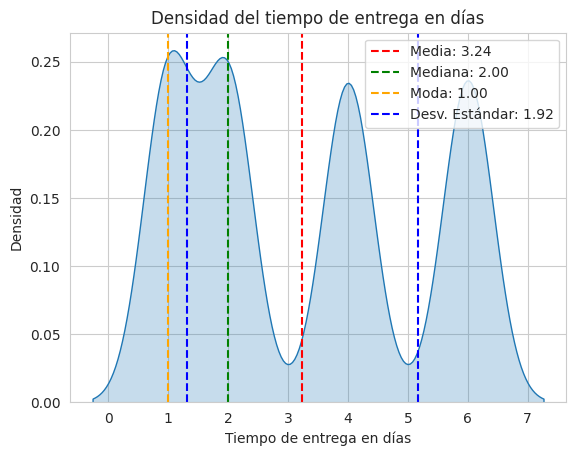

In [41]:
# Calcular estadísticas descriptivas
media = df_baseVentas['Tiempo de entrega en dias'].mean()
mediana = df_baseVentas['Tiempo de entrega en dias'].median()
desviacion_estandar = df_baseVentas['Tiempo de entrega en dias'].std()
moda = df_baseVentas['Tiempo de entrega en dias'].mode().values[0]  # Calcular la moda

# Crear el gráfico de densidad
sns.kdeplot(data=df_baseVentas, x='Tiempo de entrega en dias', fill=True)

# Añadir líneas verticales para mostrar las estadísticas descriptivas
plt.axvline(media, color='red', linestyle='--', label=f'Media: {media:.2f}')
plt.axvline(mediana, color='green', linestyle='--', label=f'Mediana: {mediana:.2f}')
plt.axvline(moda, color='orange', linestyle='--', label=f'Moda: {moda:.2f}')  # Agregar línea para la moda
plt.axvline(media + desviacion_estandar, color='blue', linestyle='--', label=f'Desv. Estándar: {desviacion_estandar:.2f}')
plt.axvline(media - desviacion_estandar, color='blue', linestyle='--')

# Añadir etiquetas y título
plt.xlabel('Tiempo de entrega en días')
plt.ylabel('Densidad')
plt.title('Densidad del tiempo de entrega en días')

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


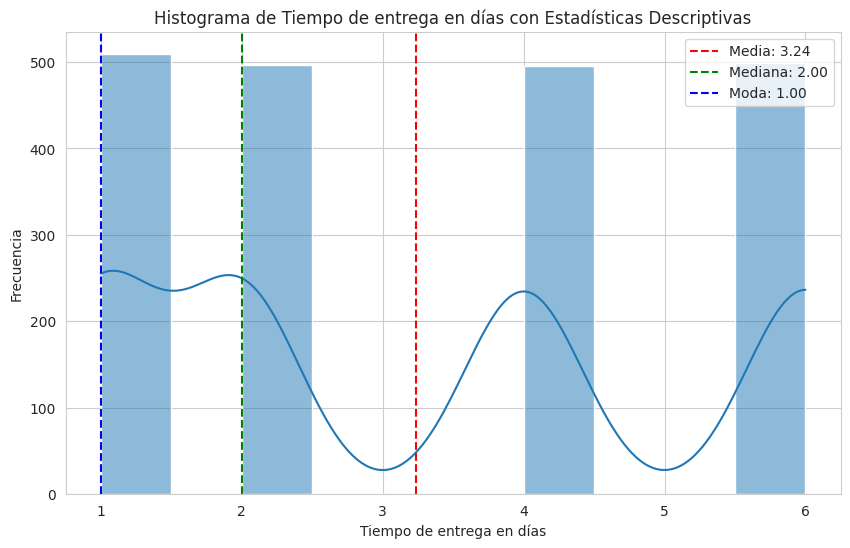

In [42]:
# Calcular estadísticas descriptivas
media = df_baseVentas['Tiempo de entrega en dias'].mean()
mediana = df_baseVentas['Tiempo de entrega en dias'].median()
moda = df_baseVentas['Tiempo de entrega en dias'].mode()[0]  # Obtener la moda como un único valor
desviacion_estandar = df_baseVentas['Tiempo de entrega en dias'].std()

# Configurar el estilo del gráfico
sns.set_style("whitegrid")

# Crear el histograma
plt.figure(figsize=(10, 6))
sns.histplot(data=df_baseVentas, x='Tiempo de entrega en dias', bins=10, kde=True)

# Añadir líneas verticales para mostrar las estadísticas descriptivas
plt.axvline(media, color='red', linestyle='--', label=f'Media: {media:.2f}')
plt.axvline(mediana, color='green', linestyle='--', label=f'Mediana: {mediana:.2f}')
plt.axvline(moda, color='blue', linestyle='--', label=f'Moda: {moda:.2f}')
plt.legend()

# Añadir etiquetas y título
plt.xlabel('Tiempo de entrega en días')
plt.ylabel('Frecuencia')
plt.title('Histograma de Tiempo de entrega en días con Estadísticas Descriptivas')

# Mostrar el gráfico
plt.show()

Dado que la media es menor que la Mediana sugiere que la cola izquierda de la distribución es más larga que la cola derecha, lo cual es característico de una distribución sesgada a la derecha (positivamente sesgada). La mayoría de los valores se agrupan en el extremo izquierdo de la distribución, con algunos valores más altos dispersos hacia la derecha.

Por lo tanto, en este caso, la distribución del tiempo de entrega en días parece ser sesgada a la derecha. Esto significa que la mayoría de las entregas se realizan en un tiempo relativamente corto, pero hay algunos casos en los que el tiempo de entrega es considerablemente mayor, lo que alarga la cola derecha de la distribución.

Esto sugiere que la mayoría de los datos se concentran en valores más bajos (hacia la izquierda) y que hay algunos valores más altos (hacia la derecha) que están inflando la media.

*Relacion entre el tiempo de entrega en dias y la experiencia del cliente*

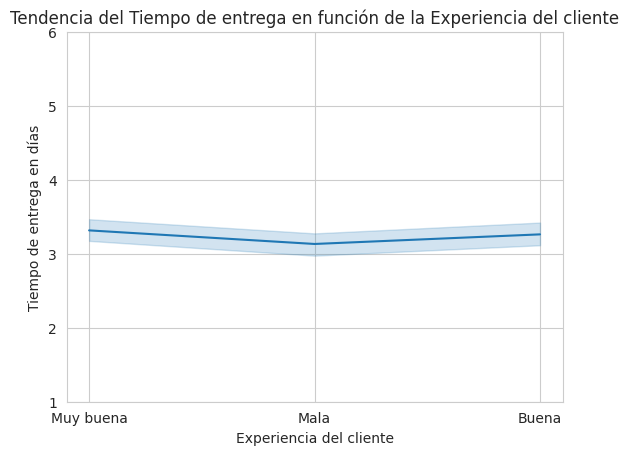

In [43]:
# Graficar el gráfico de línea
sns.lineplot(data=df_baseVentas, x='Experiencia del cliente', y='Tiempo de entrega en dias')

# Establecer límites del eje y
plt.ylim(1, 6)

# Agregar etiquetas y título
plt.xlabel('Experiencia del cliente')  # Etiqueta del eje x
plt.ylabel('Tiempo de entrega en días')  # Etiqueta del eje y
plt.title('Tendencia del Tiempo de entrega en función de la Experiencia del cliente')  # Título del gráfico

# Mostrar el gráfico
plt.show()

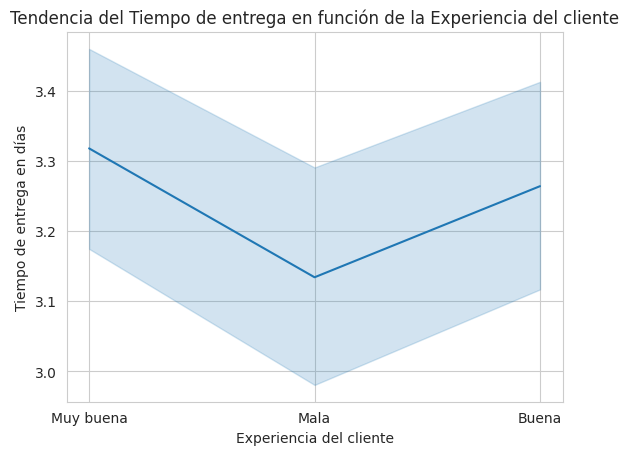

In [44]:
# Graficar el gráfico de línea
sns.lineplot(data=df_baseVentas, x='Experiencia del cliente', y='Tiempo de entrega en dias')

# Agregar etiquetas y título
plt.xlabel('Experiencia del cliente')  # Etiqueta del eje x
plt.ylabel('Tiempo de entrega en días')  # Etiqueta del eje y
plt.title('Tendencia del Tiempo de entrega en función de la Experiencia del cliente')  # Título del gráfico

# Mostrar el gráfico
plt.show()

Podemos observar que la experiencia negativa de los clientes se ve mas marcada cuando se produce en un PROMEDIO de los 3 dias

*Relacion entre experiencia del cliente y el primer contacto con el cliente, si fue presencial o digital*

In [45]:
# Se crea un DataFrame con el conteo de las categorías de "Experiencia del cliente" para cada valor de "Contacto inicial con el cliente"
df_count = df_baseVentas.groupby(['Experiencia del cliente', 'Contacto inicial con el cliente']).size().reset_index(name='Count')

# Crear el gráfico de barras apiladas
fig = px.bar(df_count, x='Experiencia del cliente', y='Count', color='Contacto inicial con el cliente',
             title='Relación entre Experiencia del cliente y Contacto inicial',
             labels={'Experiencia del cliente': 'Experiencia del cliente', 'Count': 'Frecuencia'})

# Mostrar el gráfico
fig.show()

Vemos que hay una relacion bastante homogenea con diferencia poco significativa en terminos de la experiencia del cliente, en este caso, con respecto a si el primer contacto con el cliente fue de manera presencial o digital. Se ve que la experiencia Mala se vio mas en casos presenciales.Pero podriamos decir que no afecta de manera significativa.

*Relacion entre el Tipo de venta y la Experiencia del cliente*

In [46]:
# Tabla de frecuencias
ct = pd.crosstab(df_baseVentas["Experiencia del cliente"], df_baseVentas["Tipo de venta"])

# Crear el gráfico de barras apiladas con Plotly Express
fig = px.bar(ct, x=ct.columns, y=ct.index, title="Gráfico de Barras Apiladas de Experiencia del Cliente por Tipo de Venta",
             labels={"value": "Frecuencia", "Tipo de venta": "Tipo de Venta", "Experiencia del cliente": "Experiencia del Cliente"},
             barmode="stack")
fig.show()


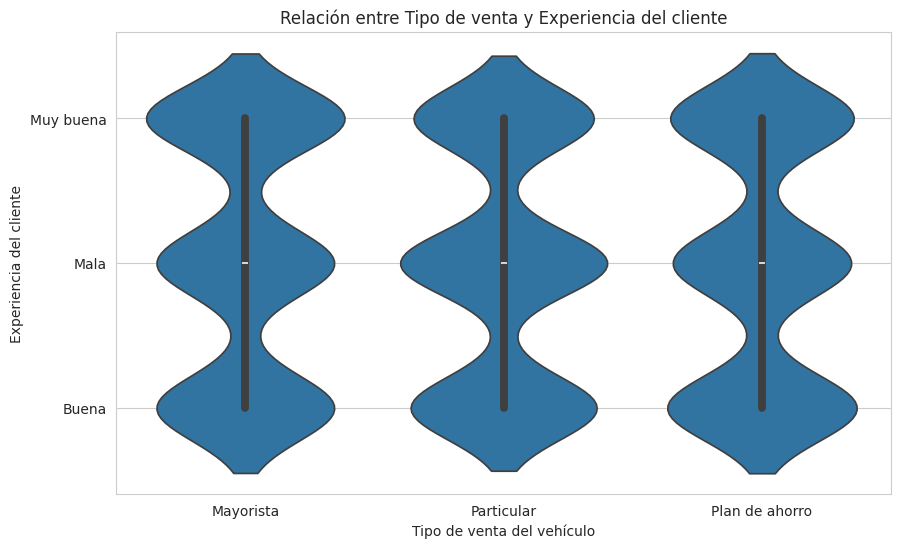

In [47]:
# Graficar la relación entre Tipo de venta y Experiencia del cliente usando un gráfico de violín
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_baseVentas, x='Tipo de venta', y='Experiencia del cliente')

# Agregar etiquetas y título
plt.xlabel('Tipo de venta del vehículo')
plt.ylabel('Experiencia del cliente')
plt.title('Relación entre Tipo de venta y Experiencia del cliente')

# Mostrar el gráfico
plt.show()



Vemos que la distribucion entre los tipo de venta con respecto a la experiencia del cliente no tienen diferencias significativas. Dentro de la experiencia Mala, en el grafico de barras apiladas vemos que la venta paticular es el que mas frecuencia presenta. Sin embargo, nuevamente la distribucion a grandes rasgos es bastante homogenea.

*Experiencia del cliente y la Gama del auto*

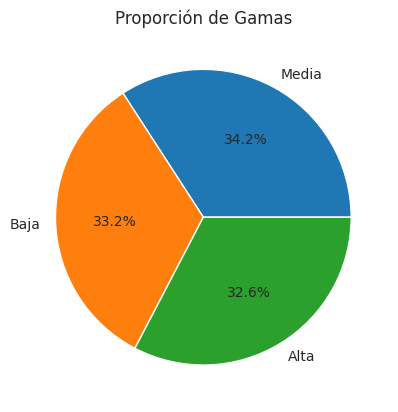

In [48]:
df_baseVentas['Gama'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proporción de Gamas')
plt.ylabel('')
plt.show()


In [49]:
# Calcular los porcentajes por categoría
total_por_categoria = df_baseVentas.groupby('Gama')['Experiencia del cliente'].count()
total_por_experiencia = df_baseVentas.groupby('Gama')['Experiencia del cliente'].value_counts().unstack().fillna(0)
porcentajes = (total_por_experiencia.div(total_por_categoria, axis=0) * 100).astype(int)

# Resetear el índice para que 'Gama' sea una columna
porcentajes.reset_index(inplace=True)

# Crear el gráfico de barras con Plotly Express
fig = px.bar(porcentajes, x='Gama', y=['Buena', 'Mala', 'Muy buena'],
             title='Relación entre Gama del vehículo y Experiencia del cliente',
             labels={'value': 'Porcentaje', 'variable': 'Experiencia del cliente'},
             hover_data={'value': True},
             barmode='stack')

# Mostrar el gráfico
fig.show()


Vemos poca variabilidad en la predominancia del tipo de experiencia de los clientes segun la gama de los autos comprados. Esto lo apreciamos en ambos graficos, tanto en el de torta como el de barras apiladas.

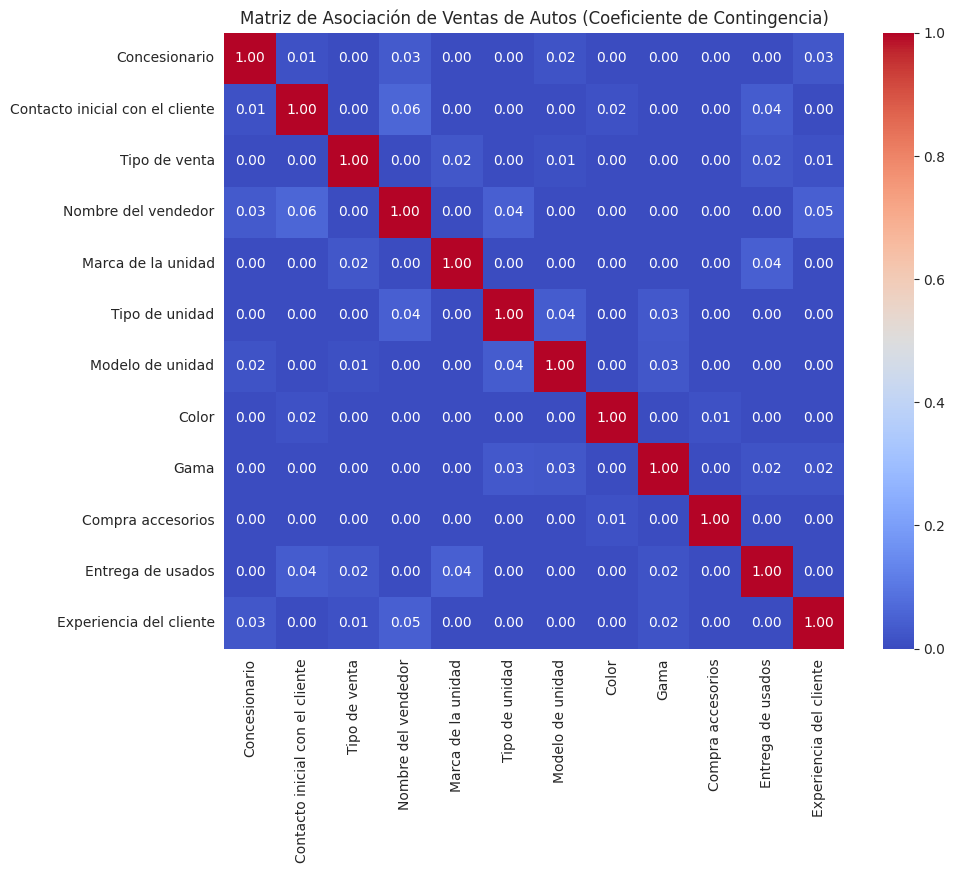

In [50]:
# Lista de columnas a borrar
columns_to_drop = ['ID Venta', 'ID Cliente', 'Patente']  # Lista de columnas a eliminar

# Crear una copia del DataFrame base sin las columnas a eliminar
df_ventas_filtered = df_baseVentas.drop(columns=columns_to_drop)

# Seleccionar solo las variables categóricas
df_ventas_categorical = df_ventas_filtered.select_dtypes(include=["object"])

# Calcular la matriz de asociación utilizando el coeficiente de contingencia
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

associations_ventas = pd.DataFrame({var1: {var2: cramers_v(df_ventas_categorical[var1], df_ventas_categorical[var2]) for var2 in df_ventas_categorical.columns} for var1 in df_ventas_categorical.columns})

# Visualizar la matriz de asociación de ventas de autos
plt.figure(figsize=(10, 8))
sns.heatmap(associations_ventas, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Asociación de Ventas de Autos (Coeficiente de Contingencia)")
plt.show()



Se puede observar que no existe una correlacion LINEAL apreciable entre las columnas que componen a la base, habiendo eliminado las que no representan caracteristicas de valor para el analisis

Ahora se procedera a realizar una transformacion a valores numericos las caracteristicas para poder empezar a trabajar los datos de entrenamiento

In [6]:
# Lista de columnas categóricas
columnas_categoricas = ['Concesionario', 'Contacto inicial con el cliente', 'Tipo de venta',
                        'Nombre del vendedor', 'Marca de la unidad', 'Tipo de unidad',
                        'Modelo de unidad', 'Color', 'Gama', 'Compra accesorios',
                        'Entrega de usados', 'Experiencia del cliente']

# Obtén variables dummy para las columnas categóricas
df_dummies = pd.get_dummies(df_baseVentas[columnas_categoricas], drop_first=True)

# Combina las variables dummy con la variable numérica "Tiempo de entrega en días"
df_num = pd.concat([df_dummies.astype(int), df_baseVentas["Tiempo de entrega en dias"]], axis=1)

# Muestra el DataFrame resultante
display(df_num)



,Concesionario_Concesionario 2,Concesionario_Concesionario 3,Contacto inicial con el cliente_Presencial,Tipo de venta_Particular,Tipo de venta_Plan de ahorro,Nombre del vendedor_Diego,Nombre del vendedor_Juan,Nombre del vendedor_Laura,Nombre del vendedor_Luis,Nombre del vendedor_Marta,...,Color_Azul,Color_Rojo,Color_Verde,Gama_Baja,Gama_Media,Compra accesorios_Si,Entrega de usados_Si,Experiencia del cliente_Mala,Experiencia del cliente_Muy buena,Tiempo de entrega en dias
0,1,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
1,0,1,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,4
2,0,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,1,1,1,0,6
3,0,1,1,1,0,0,0,0,1,0,...,1,0,0,0,1,1,1,1,0,4
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,1,1,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,6
1996,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,1,1,1,0,2
1997,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,6
1998,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,1,1,0,0,1,4


# **Aplicacion de PCA (Análisis de componentes principales)**

Se pretende lograr reducir la dimensionalidad de las variables del conjunto de datos con el objetivo de encontrar los componentes principales del dataset.

Poder reducir la cantidad de características y conservar las más relevantes para el entrenamiento de los datos y luego realizar una predicción mediante modelos de machine learning.

Antes de ello primero se debe realizar la preparación de los datos. Seguido seleccionaremos el número de componentes principales deseados, buscando los que expliquen el 95% de la varianza. Por ultimo se creara un nuevo dataset con los datos a los cuales se les aplico el PCA.

In [7]:
# Escalado de características
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_num)

# Separación de características y objetivo
features = df_num.drop(['Experiencia del cliente_Mala', 'Experiencia del cliente_Muy buena'], axis=1)
target = df_num[['Experiencia del cliente_Mala', 'Experiencia del cliente_Muy buena']]

# Aplicación de PCA
pca = PCA(n_components=0.95)
pca.fit(scaled_features)

# Transformación de características con PCA
features_pca = pca.transform(scaled_features)

# Creación del DataFrame con los componentes principales y el objetivo
pca_df_exp = pd.concat([pd.DataFrame(features_pca), target.reset_index(drop=True)], axis=1)


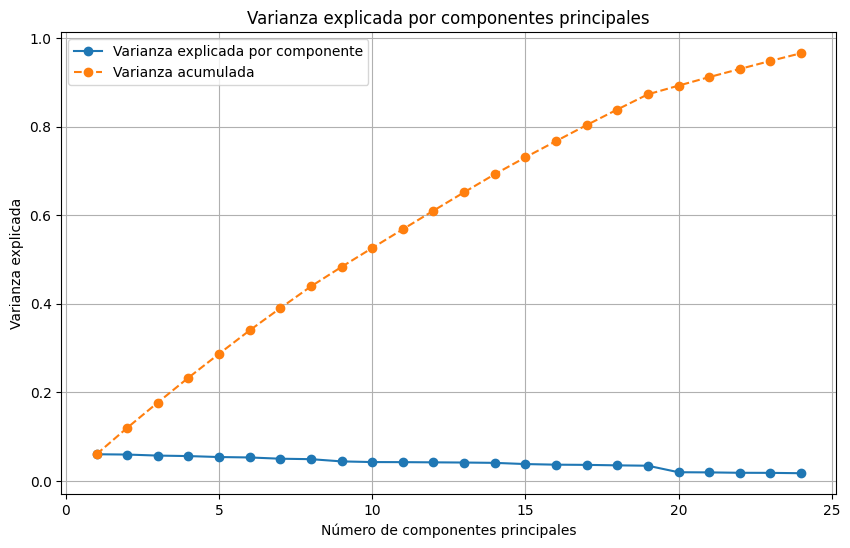

In [8]:
# Obtener la varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_

# Calcular la varianza acumulada
cumulative_variance = explained_variance.cumsum()

# Graficar la varianza explicada y acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', label='Varianza explicada por componente')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', label='Varianza acumulada')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada')
plt.title('Varianza explicada por componentes principales')
plt.legend()
plt.grid(True)
plt.show()


Podemos decir que con un numero de 25 componentes se alcanza a comprender el 95% de los datos.Al retener 25 componentes principales, se esta conservando la mayoría de la información importante de los datos originales, lo que permite reducir significativamente la dimensionalidad de los datos mientras se mantiene una cantidad sustancial de la información original. Esto puede ser útil para reducir el tiempo de procesamiento y mejorar el rendimiento del modelo de machine learning.

In [9]:
display(pca_df_exp)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,Experiencia del cliente_Mala,Experiencia del cliente_Muy buena
0,-0.855867,-1.255176,0.864405,-1.841782,0.618169,0.045803,-1.112045,2.245991,0.012216,-1.494628,...,0.232423,0.053380,1.090629,-0.664465,-1.109601,-0.430675,-0.946265,0.334665,0,1
1,-1.449964,0.913516,-1.146992,0.945027,1.609760,-2.335105,0.567322,0.396075,1.384552,1.378657,...,0.059525,-0.189088,-0.473900,0.030080,-0.077891,-0.438225,-0.057942,-0.921008,1,0
2,-1.775666,1.729246,-0.593597,-0.528788,0.716743,-1.179410,-0.223804,-0.550191,-0.586673,1.441646,...,-0.008356,-0.912222,-0.586977,0.388331,0.021102,1.447781,0.375069,-0.278882,1,0
3,-0.410653,1.002027,-2.254231,-1.746064,0.256884,-0.704722,2.330285,-0.426862,0.926240,0.842704,...,-2.025596,0.651092,0.487434,0.626852,0.049284,0.176428,0.070083,-0.169420,1,0
4,0.259535,0.201067,-0.449189,0.047193,-0.070876,0.145484,-0.186605,0.078368,-0.661600,1.129195,...,2.112208,-0.177659,-0.022282,0.406796,-0.095163,0.528957,0.406814,1.930823,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.516260,-2.244893,-1.311080,-0.425951,1.077064,-0.967011,2.543857,-0.355484,1.620323,0.840794,...,-1.155019,-0.345020,1.936528,-1.023538,-0.209388,-0.637138,-0.250811,0.011659,0,1
1996,-0.949420,0.152177,-1.620267,-1.411320,-1.750733,-0.073237,-0.741864,0.332725,-1.837227,1.078408,...,-0.231922,0.197112,0.064721,-0.262021,-0.626250,-0.048810,-0.096364,0.677580,1,0
1997,2.148349,-0.439980,-0.713594,0.953654,-1.221977,0.885634,-0.150320,0.538366,-1.063839,1.188195,...,0.914212,-1.344178,1.901428,0.632420,-0.508040,1.166426,1.434042,-0.029406,0,0
1998,-0.375110,-1.549526,-0.611069,-1.462455,1.493990,0.788967,1.914648,-0.184893,1.246671,-1.229883,...,-0.089243,0.863579,-0.282015,0.302299,0.064220,1.509969,0.167751,-0.071301,0,1


# **Evaluando modelos de Machine Learning**

Se procedió a probar 3 modelos de machine learning para ver su eficacia. Se determina cuales son lo mejores parametros para cada modelo para mejorar el rendimiento del modelo. Se utiliza el dataset "pca_df_exp" obtenido por el análisis de componentes principales.

In [10]:
# Dividir los datos en variables independientes (X) y las variables dependientes (y)
X = pca_df_exp.drop(['Experiencia del cliente_Mala', 'Experiencia del cliente_Muy buena'], axis=1)
y = pca_df_exp[['Experiencia del cliente_Mala', 'Experiencia del cliente_Muy buena']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Modelo Linear Regression**

In [11]:
# Definir los parámetros a evaluar en la búsqueda de cuadrícula
param_grid = {'fit_intercept': [True, False]}

# Inicializar el modelo de regresión lineal
model = LinearRegression()

# Realizar la búsqueda de cuadrícula
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_

# Entrenar el modelo con los mejores parámetros
best_model = LinearRegression(**best_params)
best_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = best_model.predict(X_test)

# Calcular la precisión del modelo
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mejores parámetros:", best_params)
print("Precisión del modelo (MSE):", mse)
print("Precisión del modelo (R2):", r2)



Mejores parámetros: {'fit_intercept': True}
Precisión del modelo (MSE): 0.008710553309397445
Precisión del modelo (R2): 0.9609745144212132


El valor del MSE es 0.0087, lo que sugiere que las predicciones del modelo están bastante cerca de los valores reales en promedio y el valor del R2 es 0.961, lo que sugiere que el modelo explica aproximadamente el 96.1% de la variabilidad de los datos.

En resumen, los resultados indican que el modelo de regresión lineal ajustado con los mejores parámetros tiene una precisión bastante alta y se ajusta bien a los datos.

# **Modelo Ridge Regression**

In [13]:
# Definir los parámetros a evaluar en la búsqueda de cuadrícula
param_grid = {'alpha': [0.1, 1, 10], 'fit_intercept': [True, False], 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

# Inicializar el modelo de regresión Ridge
model = Ridge()

# Realizar la búsqueda de cuadrícula
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_

# Entrenar el modelo con los mejores parámetros
best_model = Ridge(**best_params)
best_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = best_model.predict(X_test)

# Calcular la precisión del modelo
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mejores parámetros:", best_params)
print("Precisión del modelo (MSE):", mse)
print("Precisión del modelo (R2):", r2)


Mejores parámetros: {'alpha': 1, 'fit_intercept': True, 'solver': 'sparse_cg'}
Precisión del modelo (MSE): 0.008711221473415996
Precisión del modelo (R2): 0.9609715813770761


Podemos observar que del modelo Ridge cuales son los 3 parametros que mejor se ajustan. Y los valores indican que el modelo tiene un buen ajuste a los datos, con un bajo error cuadrático medio y un alto coeficiente de determinación (R2), lo que sugiere que el modelo explica aproximadamente el 96% de la variabilidad de los datos de prueba.

# **Modelo Random Forest**

In [18]:
# Definir los parámetros a evaluar en la búsqueda de cuadrícula
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Inicializar el modelo de Random Forest
model = RandomForestRegressor(random_state=42)

# Realizar la búsqueda de cuadrícula
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_

# Entrenar el modelo con los mejores parámetros
best_model = RandomForestRegressor(random_state=42, **best_params)
best_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = best_model.predict(X_test)

# Calcular la precisión del modelo
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mejores parámetros:", best_params)
print("Precisión del modelo (MSE):", mse)
print("Precisión del modelo (R2):", r2)

Mejores parámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Precisión del modelo (MSE): 0.012350968749999996
Precisión del modelo (R2): 0.9444169798372708


Podemos observar los 4 mejores parametros, el MSE es bastante bajo, lo que sugiere que el modelo está haciendo buenas predicciones en promedio y el valor alto R2 indica una precision del 94%.

# **Cross Validation**

Se probaron 3 modelos de machine learning y ahora se realizara la validación cruzada para ver cual de ellos es el que mejor se adapta al dataset y logra la mejor predicción. Para ello utilizaremos los parámetros óptimos.

In [20]:
best_params_lr = {'fit_intercept': True}
best_params_rr = {'alpha': 1, 'fit_intercept': True, 'solver': 'sparse_cg'}
best_params_rf = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

# Definir los modelos
models = {
    'Linear Regression': LinearRegression(**best_params_lr),
    'Ridge Regression': Ridge(**best_params_rr),
    'Random Forest': RandomForestRegressor(**best_params_rf)
}

# Realizar validación cruzada y calcular la precisión de cada modelo
for name, model in models.items():
    mse_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mse_mean = -mse_scores.mean()
    mse_std = mse_scores.std()
    r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    r2_mean = r2_scores.mean()
    r2_std = r2_scores.std()
    print(f"Modelo: {name}")
    print(f"Precisión del modelo (MSE): {mse_mean:.4f} +/- {mse_std:.4f}")
    print(f"Precisión del modelo (R2): {r2_mean:.4f} +/- {r2_std:.4f}")
    print("------------------------")



Modelo: Linear Regression
Precisión del modelo (MSE): 0.0089 +/- 0.0004
Precisión del modelo (R2): 0.9600 +/- 0.0019
------------------------
Modelo: Ridge Regression
Precisión del modelo (MSE): 0.0089 +/- 0.0004
Precisión del modelo (R2): 0.9600 +/- 0.0019
------------------------
Modelo: Random Forest
Precisión del modelo (MSE): 0.0160 +/- 0.0042
Precisión del modelo (R2): 0.9299 +/- 0.0173
------------------------


Podemos observar que de los modelos utilizados, dos de ellos, el Ridge Regression y Linear Regression, tienen los mismos desempeños. Si bien el modelo de Random Forest presenta un buen desempeño, se encuentra opacado en comparacion a los otros dos modelos utilizados.

Por lo cual se debe optar por uno de los de regresion. Para ello se toma como parametro, el modelo mas robusto, seria el caso de la regresión ridge. Esta se comporta mejor que la regresión lineal cuando hay multicolinealidad entre las características predictoras.



# **Modelo final**

In [22]:
# Definir los mejores parámetros obtenidos
best_params_rr = {'alpha': 1, 'fit_intercept': True, 'solver': 'sparse_cg'}

# Modelo de regresión Ridge con los mejores parámetros
final_model_rr = Ridge(**best_params_rr)

# Entrenar el modelo con los datos de entrenamiento
final_model_rr.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions_rr = final_model_rr.predict(X_test)

# Calcular la precisión del modelo
mse_rr = mean_squared_error(y_test, predictions_rr)
r2_rr = r2_score(y_test, predictions_rr)

print("Mejores parámetros para Ridge Regression:", best_params_rr)
print("Precisión del modelo (MSE) para Ridge Regression:", mse_rr)
print("Precisión del modelo (R2) para Ridge Regression:", r2_rr)


Mejores parámetros para Ridge Regression: {'alpha': 1, 'fit_intercept': True, 'solver': 'sparse_cg'}
Precisión del modelo (MSE) para Ridge Regression: 0.008711221473415996
Precisión del modelo (R2) para Ridge Regression: 0.9609715813770761


In [34]:
# Procesar advertencias sobre divisiones por cero
warnings.filterwarnings("ignore", category=UserWarning)

# Convertir las predicciones del modelo en etiquetas de clase binarias
predictions_class = (predictions_rr > 0.5).astype(int)

# Calcular la precisión del modelo en datos de prueba
accuracy = accuracy_score(y_test, predictions_class)
print(f"Precisión del modelo en datos de prueba: {accuracy:.3f}")

# Mostrar el informe de clasificación
print("Informe de clasificación:")
print(classification_report(y_test, predictions_class))



Precisión del modelo en datos de prueba: 1.000
Informe de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00       129

   micro avg       1.00      1.00      1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268
 samples avg       0.67      0.67      0.67       268



De los resultados obtenidos, podemos sacar las siguientes afirmaciones:


1. La precision del modelo alcanzo el 100% en los datos de prueba. Lo que significa que fue capaz de predecir correctamente si un cliente tendría una experiencia mala o muy buena en todos los casos evaluados.  
2. Columna "Precision": La proporción de instancias clasificadas para la experiencia de los clientes, siendo mala o muy buena, la precisión es del 100% para ambas clases.
3. Columna "recall"(o sensibilidad): es la proporción de instancias positivas que fueron correctamente clasificadas por el modelo. Aquí también se obtuvo un recall del 100%, lo que significa que el modelo identificó correctamente todas las instancias positivas.
4. Columna F1-score: es la media armónica entre precision y recall. Podemos ver que es del 100% para ambas clases, lo que indica un buen equilibrio entre precision y recall.

En resumen, estos resultados sugieren que el modelo de predicción es altamente efectivo para clasificar si un cliente tendrá una experiencia mala o muy buena, al menos en el conjunto de datos de prueba utilizado





# **Conclusiones**


Dado que los resultados del modelo muestran una precisión del 100% en la predicción de si un cliente tendrá una buena experiencia en el mercado automotriz, podemos concluir lo siguiente:

Apoyo a la hipótesis alternativa (H1): La precisión del 100% del modelo sugiere que existe una diferencia significativa en la probabilidad de que un nuevo cliente tenga una buena experiencia en el mercado automotriz. Esto respalda la idea de que el modelo de predicción tiene un impacto significativo en la capacidad de predecir la experiencia de los nuevos clientes.

Rechazo de la hipótesis nula (H0): Dado que el modelo logra una precisión del 100%, podemos rechazar la hipótesis nula de que no hay diferencia en la probabilidad de que un nuevo cliente tenga una buena experiencia en el mercado automotriz. Los resultados indican claramente que el modelo sí tiene un impacto significativo en la capacidad de predicción.

En resumen, los resultados del modelo respaldan la idea de que el modelo de predicción utilizado tiene un alto nivel de precisión en la predicción de la experiencia de los nuevos clientes en el mercado automotriz, lo que sugiere que el modelo es efectivo y tiene un impacto significativo en la capacidad de predicción.